In [ ]:
%matplotlib inline

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram

# Generate a pass manager without providing a backend
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.primitives import StatevectorSampler

import matplotlib.pyplot as plt

In [37]:
# Define a function to create and measure a given Bell state
def create_bell_state(state_label):

    qubits = QuantumRegister(2, name='qubit') 
    medida = ClassicalRegister(2, name='medida')

    circuit = QuantumCircuit(qubits, medida)  # Two qubits, two classical bits
    circuit.h(0)  # Apply Hadamard gate to the first qubit
    circuit.cx(0, 1)  # Apply CNOT gate with qubit 0 as control and qubit 1 as target
    
    if state_label == 'Phi-':
        circuit.z(0)  # Apply Z gate to first qubit
    elif state_label == 'Psi+':
        circuit.x(1)  # Apply X gate to second qubit
    elif state_label == 'Psi-':
        circuit.x(1)  # Apply X gate to second qubit
        circuit.z(0)  # Apply Z gate to first qubit
    
    # Measure the qubits
    circuit.barrier()
    circuit.measure(qubits, medida)
    
    return circuit

In [38]:
# Define the four Bell states
bell_states = {'Phi^+': create_bell_state('Phi^+'),
               'Phi^-': create_bell_state('Phi^-'),
               'Psi^+': create_bell_state('Psi^+'),
               'Psi^-': create_bell_state('Psi^-')}

In [39]:
pm = generate_preset_pass_manager(optimization_level=1)
sampler = StatevectorSampler()

<string>:14: SyntaxWarning: invalid escape sequence '\{'
<>:14: SyntaxWarning: invalid escape sequence '\{'
<string>:14: SyntaxWarning: invalid escape sequence '\{'
<>:14: SyntaxWarning: invalid escape sequence '\{'
/tmp/ipykernel_4913/2561022599.py:14: SyntaxWarning: invalid escape sequence '\{'
  plot_histogram(counts, title=f'Measurement Outcomes for $\{label}$')


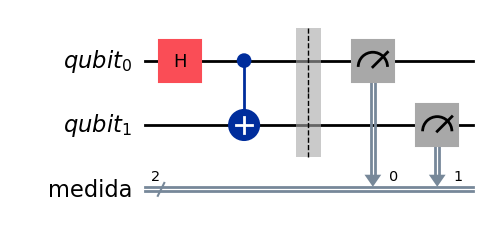

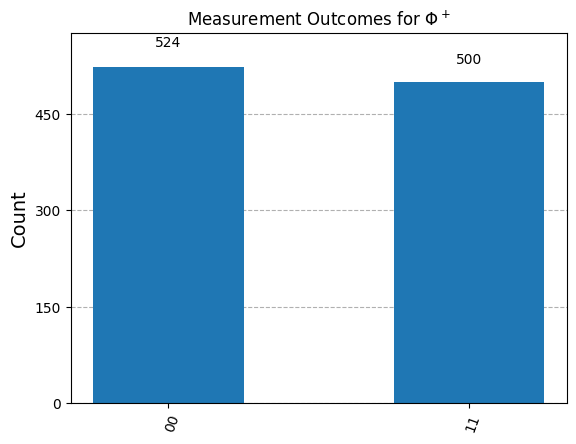

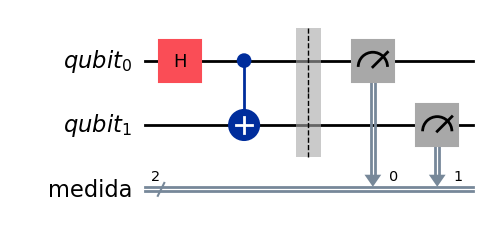

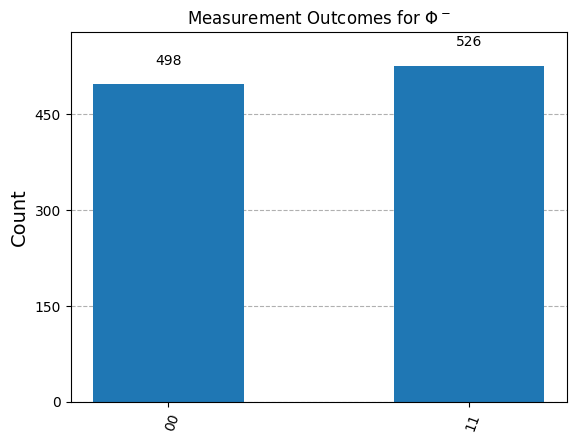

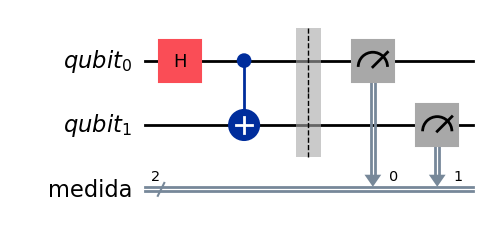

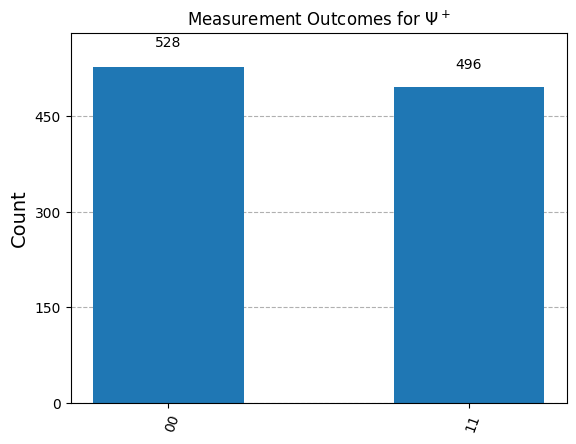

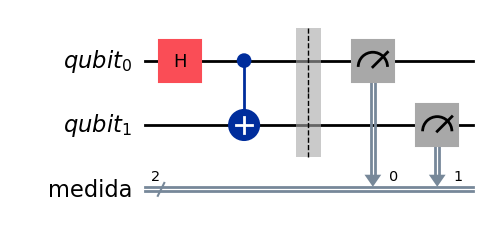

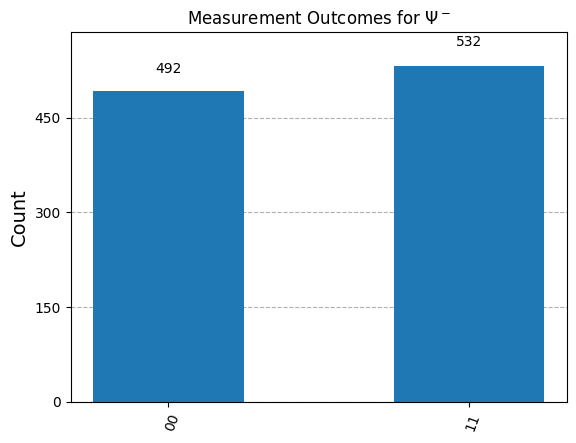

In [40]:
# Run and display results for each Bell state
results = {}
for label, circuit in bell_states.items():
    isa_circuit = pm.run(circuit)
    job = sampler.run([isa_circuit]) # execute 1 circuit with Sampler
    pub_result = job.result()[0]

    data_pub = pub_result.data # Access result data for PUB 0
    counts = data_pub.medida.get_counts() # Get counts for the classical register "meas"
    results[label] = counts

    circuit.draw("mpl", style="iqp")
    plt.show()
    plot_histogram(counts, title=f'Measurement Outcomes for $\{label}$')
    plt.show()